In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━

random binary string =  [0 1 0 0 1]


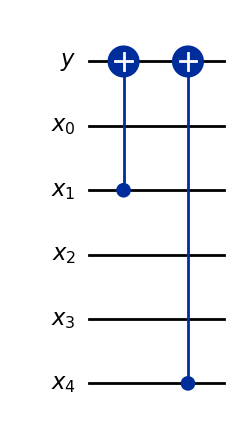

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
# 임의의 s에 대한 n-qubit의 번스타인-바지라니 오라클 회로를 구현하는 함수
def bv_oracle_circuit(n, reveal=False):
    qy = QuantumRegister(1, 'y')
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qy, qx) # qc 라는 이름의 n+1큐비트 양자 회로 객체를 생성

    np.random.seed()  # numpy의 random 함수를 초기화
    s = np.random.randint(0, 2, size=n)
    if(reveal): print("random binary string = ", s)

    # implement |x,y> -> |x, y XOR f(X)>
    # where f(x) = x[0]s[0] XOR x[1]s[1] XOR ... XOR x[n-1]s[n-1]
    for i in range(n):
      if s[i] == 1: # 생성된 i번째 난수가 1인 경우
        qc.cx(qx[i], qy) # 제어 큐비트 qx[i], 타겟 큐비트 qy인 CX(CNOT) gate

    qc.name = "BV Oracle"
    hs = ''
    for c in reversed(s):
      hs += str(c)
    return qc, hs

circuit, hs = bv_oracle_circuit(5, True) # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl')

random binary string =  [0 1 1 0 0 1 0 0]
hidden string = 00100110


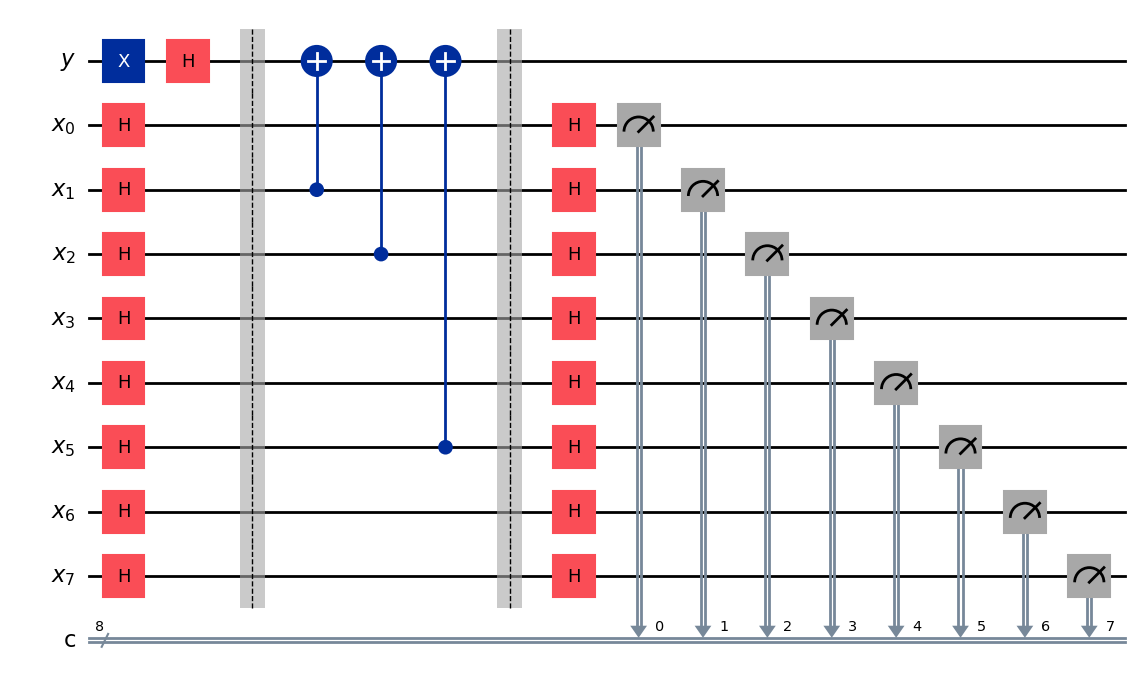

In [10]:
# 번스타인-바지라니 오라클 함수를 호출하여 번스타인-바지라니 회로를 circuit 이라는 이름의 객체로 구현
n = 8
qx = QuantumRegister(n,'x')  # n 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
qy = QuantumRegister(1,'y')  # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
c = ClassicalRegister(n,'c') # 1 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시
circuit = QuantumCircuit(qy, qx, c) # qy,qx,c 를 가지는 양자 회로를 circuit 이라는 이름의 객체로 생성
circuit.h(qx)                # qx 의 모든 큐비트에 H gate 적용
circuit.x(qy)                # qy 큐비트에 X gate ->  |1> 이 됨
circuit.h(qy)                # qy 큐비트에 H gate ->  |-> 이 됨
circuit.barrier()

# bv_oracle_circuit() 을 호출하여 오라클 회로를 circuit 에 추가
oracle, hs = bv_oracle_circuit(n, True)
print(f'hidden string = {hs}')
circuit.compose(oracle, inplace=True)

circuit.barrier()
circuit.h(qx)         # qx 의 모든 큐비트에 H gate 적용
circuit.measure(qx,c) # qx 레지스터의 모든 큐비트들을 c 레지스터에서 역순으로 측정하는 회로를 구현
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

In [11]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.c.get_counts()
print (count)

{'00100110': 1}


In [13]:
measured = list(count.keys())[0]

print (f'The measured value {measured} ', end='')
if hs == measured :
    print(f'is equal to the hidden string {hs}')
else :
    print(f'is not equal to the hidden string {hs}')

The measured value 00100110 is equal to the hidden string 00100110
